In [ ]:
import torch
import numpy as np
from torch.optim import Adam
import matplotlib.pyplot as plt

#RNN - Elmon Network

In [ ]:
elman_loss = []

class RNN_Elman():
  def __init__(self, input_size, hidden_size):
    self.hidden_size = hidden_size
    self.Wxh = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Whh = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Why = torch.randn(1, hidden_size,requires_grad=True)
    self.bh = torch.zeros(hidden_size, 1,requires_grad=True)
    self.by = torch.zeros(1, 1,requires_grad=True)
    self.optimizer = Adam([self.Wxh,self.Whh,self.Why,self.bh,self.by],lr=0.001)

  def Forward_Pass(self,x):
    h = torch.zeros(self.hidden_size, 1)
    for i in range(len(x)):
      x_i = x[i]
      a = torch.matmul(self.Whh, h)
      h = torch.matmul(self.Wxh, x_i)
      h = h + a
      h = h + self.bh
      h = torch.tanh(h)
    y_pred = torch.matmul(self.Why, h) + self.by
    return y_pred

  def Train(self, x_train, y_train, num_epochs=10):
    for epoch in range(num_epochs):
      acc_loss = 0
      for i in range(len(x_train)):
        x = x_train[i]
        y = y_train[i]
        y_pred = self.Forward_Pass(x)
        loss = torch.mean((y_pred - y) ** 2)
        acc_loss += loss.item()
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

      elman_loss.append(acc_loss/5000)
      print("Loss at Epoch Number",epoch+1,"is:",acc_loss/5000)

In [ ]:
#Single Dataset Creation:
max_seq_len = 10

def Create_Dataset():
  var_len = np.random.randint(2,max_seq_len)
  pos1 = np.random.choice([x for x in range(var_len)])
  pos2 = np.random.choice([x for x in range(var_len) if x != pos1])

  x_seq = np.zeros((var_len,2))
  x_seq[:,0] = np.random.rand(var_len)
  x_seq[pos1,1] = 1
  x_seq[pos2,1] = 1
  y_seq = [x_seq[pos1,0] + x_seq[pos2,0]]
  
  return x_seq,y_seq

In [ ]:
#Create Training Data
num_of_inputs = 5000
X_Train = []
Y_Train = []
for i in range(num_of_inputs):
  x_i, y_i = Create_Dataset()
  x_i = torch.tensor(x_i).float()
  y_i = torch.tensor(y_i).float()
  X_Train.append(x_i)
  Y_Train.append(y_i)

In [ ]:
RNN_Model = RNN_Elman(2,2)
RNN_Model.Train(X_Train,Y_Train)

Loss at Epoch Number 1 is: 0.3274583357127786
Loss at Epoch Number 2 is: 0.13863273923799777
Loss at Epoch Number 3 is: 0.13391961448548803
Loss at Epoch Number 4 is: 0.1306988697528662
Loss at Epoch Number 5 is: 0.1269964356268659
Loss at Epoch Number 6 is: 0.12086969232937886
Loss at Epoch Number 7 is: 0.11545460810578184
Loss at Epoch Number 8 is: 0.11305335638786074
Loss at Epoch Number 9 is: 0.1115151283249728
Loss at Epoch Number 10 is: 0.11035875285870281


#LSTM

In [ ]:
lstm_loss = []

class LSTM():
  def __init__(self, input_size, hidden_size):
    self.hidden_size = hidden_size
    self.Wxi = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Whi = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Wxf = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Whf = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Wxc = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Whc = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Wxo = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Who = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Why = torch.randn(1, hidden_size,requires_grad=True)
    self.bi = torch.zeros(hidden_size, 1,requires_grad=True)
    self.bf = torch.zeros(hidden_size, 1,requires_grad=True)
    self.bc = torch.zeros(hidden_size, 1,requires_grad=True)
    self.bo = torch.zeros(hidden_size, 1,requires_grad=True)
    self.by = torch.zeros(1, 1,requires_grad=True)
    self.optimizer = Adam([self.Wxi,self.Whi,self.Wxf,self.Whf,self.Wxc,self.Whc,self.Wxo,self.Who,self.Why,self.bi,self.bf,self.bc,self.bo,self.by], lr=0.001)

  def Forward_Pass(self,x):
    h = torch.zeros(self.hidden_size, 1)
    c_t = torch.zeros(self.hidden_size, 1)
    for i in range(len(x)):
      x_i = x[i]
      i_t = torch.matmul(self.Wxi, x_i) + torch.matmul(self.Whi, h) + self.bi
      i_t = torch.sigmoid(i_t)

      f_t = torch.matmul(self.Wxf, x_i)
      f_t = f_t + torch.matmul(self.Whf, h)
      f_t = f_t + self.bf
      f_t = torch.sigmoid(f_t)
      
      c_t_bar = torch.matmul(self.Wxc, x_i) + torch.matmul(self.Whc, h) + self.bc
      c_t_bar = torch.tanh(c_t_bar)
      o_t = torch.matmul(self.Wxo, x_i) + torch.matmul(self.Who, h) + self.bo
      o_t = torch.sigmoid(o_t)
      c_t = f_t * c_t + i_t * c_t_bar
      h = o_t * torch.tanh(c_t)

    y_pred = torch.matmul(self.Why, h) + self.by
    return y_pred

  def Train(self, x_train, y_train, num_epochs=10):
    for epoch in range(num_epochs):
      acc_loss = 0
      for i in range(len(x_train)):
        x = x_train[i]
        y = y_train[i]
        y_pred = self.Forward_Pass(x)
        loss = torch.mean((y_pred - y) ** 2)
        acc_loss += loss.item()
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
      
      lstm_loss.append(acc_loss/5000)
      print("Loss at Epoch Number",epoch+1,"is:",acc_loss/5000)

In [ ]:
LSTM_Model = LSTM(2,2)
LSTM_Model.Train(X_Train,Y_Train)

Loss at Epoch Number 1 is: 0.20752095126122022
Loss at Epoch Number 2 is: 0.07797969057365317
Loss at Epoch Number 3 is: 0.04773962840525012
Loss at Epoch Number 4 is: 0.03258633354133817
Loss at Epoch Number 5 is: 0.0199042331823896
Loss at Epoch Number 6 is: 0.010607814485199697
Loss at Epoch Number 7 is: 0.006213350195477949
Loss at Epoch Number 8 is: 0.0043779234345507345
Loss at Epoch Number 9 is: 0.0033951789525348886
Loss at Epoch Number 10 is: 0.002724662378244068


#GRU

In [ ]:
gru_loss = []

class GRU():
  def __init__(self, input_size, hidden_size):
    self.hidden_size = hidden_size
    self.Wxr = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Whr = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Wxz = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Whz = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Wxh = torch.randn(hidden_size, input_size,requires_grad=True)
    self.Whh = torch.randn(hidden_size, hidden_size,requires_grad=True)
    self.Why = torch.randn(1, hidden_size,requires_grad=True)
    self.br = torch.zeros(hidden_size, 1,requires_grad=True)
    self.bz = torch.zeros(hidden_size, 1,requires_grad=True)
    self.bh = torch.zeros(hidden_size, 1,requires_grad=True)
    self.by = torch.zeros(1, 1,requires_grad=True)
    self.optimizer = torch.optim.Adam([self.Wxr,self.Whr,self.Wxz,self.Whz,self.Wxh,self.Whh,self.Why,self.br,self.bh,self.by], lr=0.001)

  def Forward_Pass(self,x):
    h_t = torch.zeros(self.hidden_size, 1)
    for i in range(len(x)):
      x_i = x[i]
      r_t = torch.matmul(self.Wxr, x_i) + torch.matmul(self.Whr, h_t) + self.br
      r_t = torch.sigmoid(r_t)
      z_t = torch.matmul(self.Wxz, x_i) + torch.matmul(self.Whz, h_t) + self.bz
      z_t = torch.sigmoid(z_t)
      h_t_bar = torch.matmul(self.Wxh, x_i) + r_t * torch.matmul(self.Whh, h_t) + self.bh
      h_t_bar = torch.tanh(h_t_bar)
      h_t = (1 - z_t) * h_t + z_t * h_t_bar
    y_pred = torch.matmul(self.Why, h_t) + self.by
    return y_pred

  def Train(self, x_train, y_train, num_epochs=10):
    for epoch in range(num_epochs):
      acc_loss = 0
      for i in range(len(x_train)):
        x = x_train[i]
        y = y_train[i]
        y_pred = self.Forward_Pass(x)
        loss = torch.mean((y_pred - y) ** 2)
        acc_loss += loss.item()
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
      
      gru_loss.append(acc_loss/5000)
      print("Loss at Epoch Number",epoch+1,"is:",acc_loss/5000)

In [ ]:
GRU_Model = GRU(2,2)
GRU_Model.Train(X_Train,Y_Train)

Loss at Epoch Number 1 is: 0.1896837143718787
Loss at Epoch Number 2 is: 0.13247763330232884
Loss at Epoch Number 3 is: 0.09015751003223013
Loss at Epoch Number 4 is: 0.06423379620479104
Loss at Epoch Number 5 is: 0.03970137228108415
Loss at Epoch Number 6 is: 0.022215919275967826
Loss at Epoch Number 7 is: 0.013769455058907238
Loss at Epoch Number 8 is: 0.0094926065204947
Loss at Epoch Number 9 is: 0.007673885253471656
Loss at Epoch Number 10 is: 0.006735679150258397


#Loss vs Number of Epochs Graph

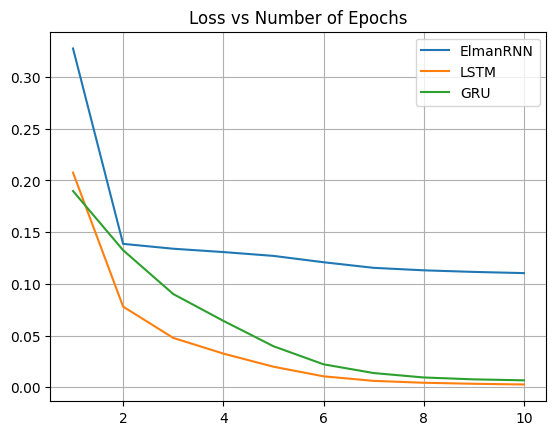

In [ ]:
x = [i for i in range(1,11)]
plt.plot(x,elman_loss,label='ElmanRNN')
plt.plot(x,lstm_loss,label='LSTM')
plt.plot(x,gru_loss,label='GRU')
plt.legend()
plt.grid()
plt.title('Loss vs Number of Epochs')
plt.show()

In [ ]:
num_of_inputs = 100
X_Test = []
Y_Test = []
for i in range(num_of_inputs):
  x_i, y_i = Create_Dataset()
  x_i = torch.tensor(x_i).float()
  y_i = torch.tensor(y_i).float()
  X_Test.append(x_i)
  Y_Test.append(y_i)

In [ ]:
y_test_Elman = []
y_test_LSTM = []
y_test_GRU = []
y_test_base = []
for i in range(len(X_Test)):
  x = X_Test[i]
  y = Y_Test[i]

  y_pred_elman = RNN_Model.Forward_Pass(x)[0][0].item()
  y_pred_LSTM = LSTM_Model.Forward_Pass(x)[0][0].item()
  y_pred_GRU = GRU_Model.Forward_Pass(x)[0][0].item()

  y_test_Elman.append(y_pred_elman)
  y_test_LSTM.append(y_pred_LSTM)
  y_test_GRU.append(y_pred_GRU)
  y_test_base.append(1)

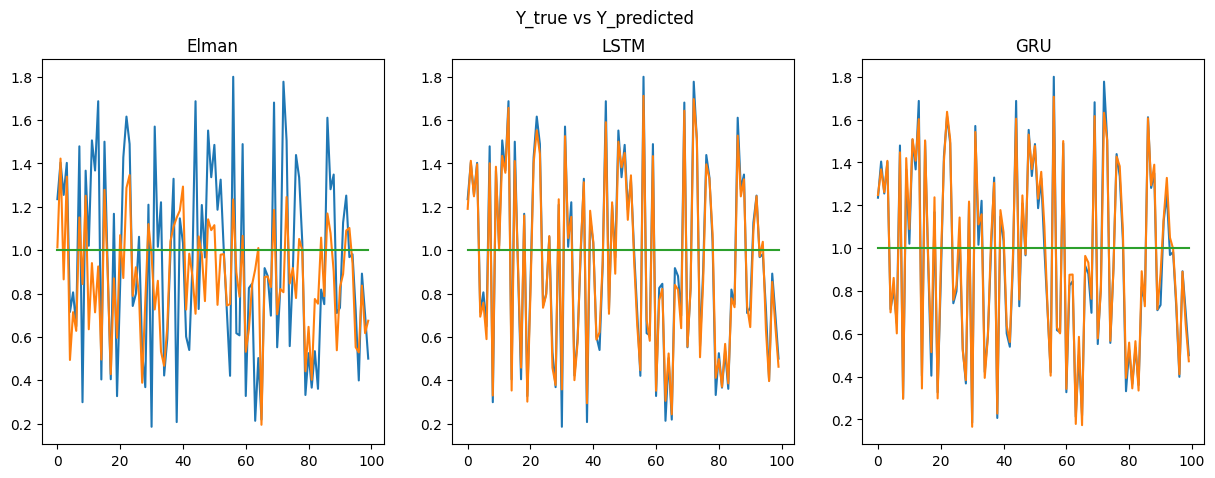

In [154]:
figure, axis = plt.subplots(1, 3,figsize=(15,5))
Y_Test = np.array(Y_Test)

axis[0].plot(Y_Test,label='Actual')
axis[0].plot(y_test_Elman,label='Predicted')
axis[0].plot(y_test_base,label='Base')
axis[0].set_title('Elman')

axis[1].plot(Y_Test,label='Actual')
axis[1].plot(y_test_LSTM,label='Predicted')
axis[1].plot(y_test_base,label='Base')
axis[1].set_title('LSTM')

axis[2].plot(Y_Test,label='Actual')
axis[2].plot(y_test_GRU,label='Predicted')
axis[2].plot(y_test_base,label='Base')
axis[2].set_title('GRU')

figure.suptitle('Y_true vs Y_predicted')

plt.show()

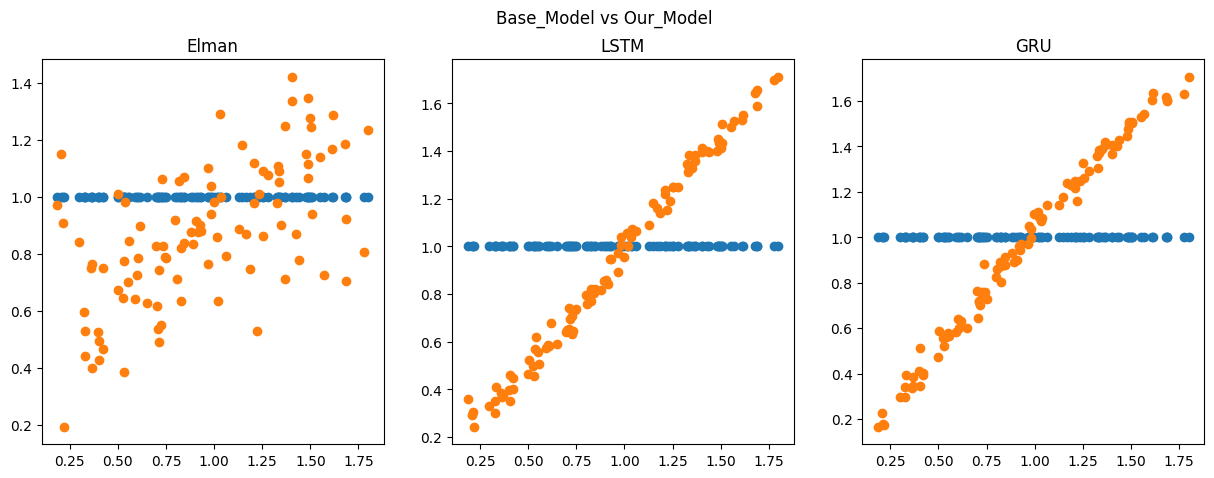

In [155]:
figure, axis = plt.subplots(1, 3,figsize=(15,5))
Y_Test = np.array(Y_Test)

axis[0].scatter(Y_Test,y_test_base,label='Base')
axis[0].scatter(Y_Test,y_test_Elman,label='Predicted')
axis[0].set_title('Elman')

axis[1].scatter(Y_Test,y_test_base,label='Base')
axis[1].scatter(Y_Test,y_test_LSTM,label='Predicted')
axis[1].set_title('LSTM')

axis[2].scatter(Y_Test,y_test_base,label='Base')
axis[2].scatter(Y_Test,y_test_GRU,label='Predicted')
axis[2].set_title('GRU')

figure.suptitle('Base_Model vs Our_Model')

plt.show()